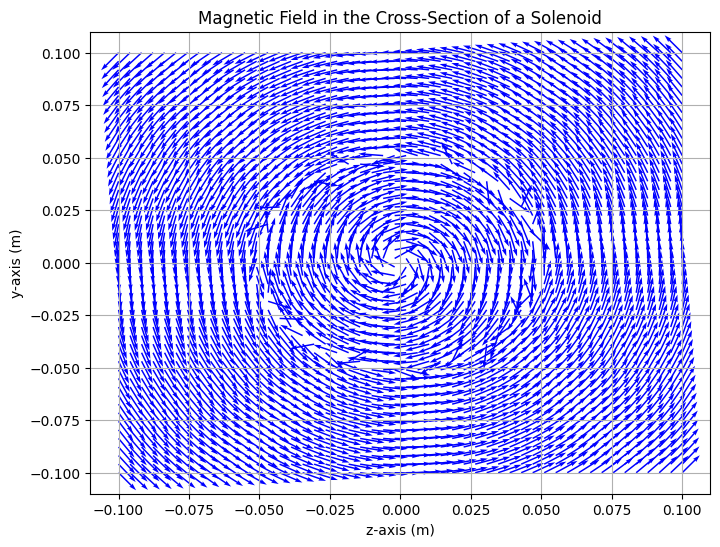

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
I = 1.0  # Current in solenoid wires (A)
R = 0.05  # Radius of solenoid (m)
N_turns = 100  # Number of turns in solenoid
dl = 2 * np.pi * R / N_turns  # Small segment length for line integral

# Define the observation points (cross-section at x = 0)
z = np.linspace(-0.1, 0.1, 50)  # Z-axis range
y = np.linspace(-0.1, 0.1, 50)  # Y-axis range
Z, Y = np.meshgrid(z, y)
Bx = np.zeros(Z.shape)  # Magnetic field x-component
By = np.zeros(Z.shape)  # Magnetic field y-component

# Solenoid wire loop segments
theta = np.linspace(0, 2 * np.pi, N_turns)
wire_z = R * np.cos(theta)
wire_y = R * np.sin(theta)

# Calculate magnetic field using Biot-Savart law
for i in range(len(wire_z)):
    r_vec_z = Z - wire_z[i]
    r_vec_y = Y - wire_y[i]
    r_mag = np.sqrt(r_vec_z**2 + r_vec_y**2)
    dB_z = mu_0 * I * (-r_vec_y / r_mag**3) * dl / (2 * np.pi)
    dB_y = mu_0 * I * (r_vec_z / r_mag**3) * dl / (2 * np.pi)
    Bx += dB_z
    By += dB_y

# Normalize for visualization purposes
magnitude = np.sqrt(Bx**2 + By**2)
Bx /= magnitude
By /= magnitude

# Plot the magnetic field vectors
plt.figure(figsize=(8, 6))
plt.quiver(Z, Y, Bx, By, scale=25, color='blue')
plt.xlabel('z-axis (m)')
plt.ylabel('y-axis (m)')
plt.title('Magnetic Field in the Cross-Section of a Solenoid')
plt.grid()
plt.show()

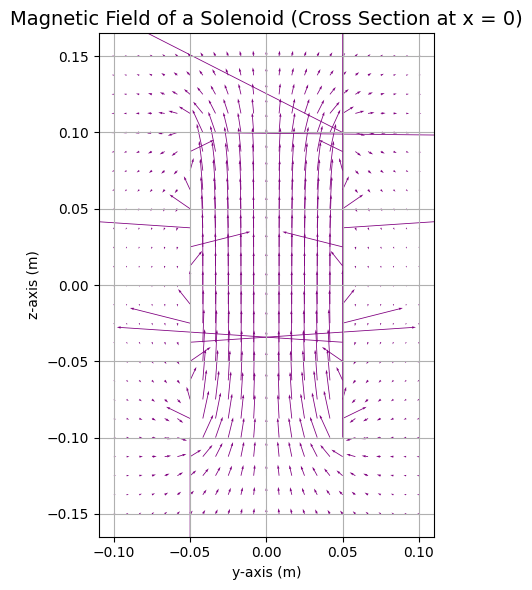

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

# Biot–Savart constant
def biot_savart(dl, r_vec):
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0])  # avoid singularity
    return np.cross(dl, r_vec) / r_mag**3

# Solenoid parameters
R = 0.05  # solenoid radius (m)
length = 0.2  # solenoid height (z-axis length) (m)
turns = 20  # total number of loops
I = 1.0  # current in amperes
n_segments = 100  # segments per loop

# Observation grid (in yz plane at x = 0)
y = np.linspace(-0.1, 0.1, 25)
z = np.linspace(-0.15, 0.15, 25)
Y, Z = np.meshgrid(y, z)

# Initialize magnetic field components
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Build each loop at height z_loop
z_loops = np.linspace(-length/2, length/2, turns)

for z_loop in z_loops:
    theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
    dtheta = theta[1] - theta[0]

    # Wire path: full circular loop in x-y plane
    for i in range(n_segments):
        t0 = theta[i]
        t1 = theta[i] + dtheta

        # Segment endpoints in 3D (x, y, z)
        r0 = np.array([R * np.cos(t0), R * np.sin(t0), z_loop])
        r1 = np.array([R * np.cos(t1), R * np.sin(t1), z_loop])
        dl = r1 - r0

        # For cross section at x=0, only compute B in y-z plane
        for idx in np.ndindex(Y.shape):
            obs_point = np.array([0.0, Y[idx], Z[idx]])
            r_vec = obs_point - r0
            dB = biot_savart(dl, r_vec)
            By[idx] += dB[1]
            Bz[idx] += dB[2]

# Scale Biot–Savart result
const = mu_0 * I / (4 * np.pi)
By *= const
Bz *= const

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.quiver(Y, Z, By, Bz, color='purple', scale=0.005, scale_units='xy', angles='xy')

ax.set_title("Magnetic Field of a Solenoid (Cross Section at x = 0)", fontsize=14)
ax.set_xlabel("y-axis (m)")
ax.set_ylabel("z-axis (m)")
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()


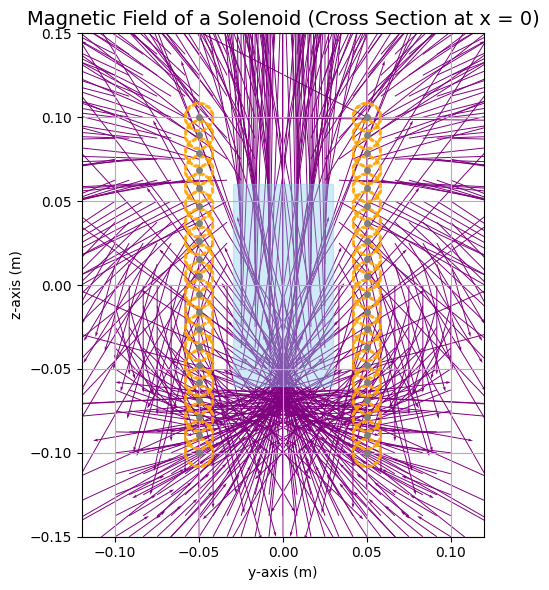

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

# Biot–Savart constant
def biot_savart(dl, r_vec):
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0])  # avoid singularity
    return np.cross(dl, r_vec) / r_mag**3

# Solenoid parameters
R = 0.05  # solenoid radius (m)
length = 0.2  # solenoid height (z-axis length) (m)
turns = 20  # total number of loops
I = 1.0  # current in amperes
n_segments = 100  # segments per loop

# Observation grid (in yz plane at x = 0)
y = np.linspace(-0.1, 0.1, 25)
z = np.linspace(-0.15, 0.15, 25)
Y, Z = np.meshgrid(y, z)

# Initialize magnetic field components
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)
# Paramagnetic region (centered inside solenoid)
mu_r = 10  # Relative permeability
para_width = 0.06  # y-axis width
para_height = 0.12  # z-axis height
para_center = (0.0, 0.0)  # (y, z) center

# Bounds of the region
y_min = para_center[0] - para_width / 2
y_max = para_center[0] + para_width / 2
z_min = para_center[1] - para_height / 2
z_max = para_center[1] + para_height / 2

# Apply magnetic enhancement inside the material
for idx in np.ndindex(Y.shape):
    y_val, z_val = Y[idx], Z[idx]
    if y_min <= y_val <= y_max and z_min <= z_val <= z_max:
        By[idx] *= mu_r
        Bz[idx] *= mu_r

# Build each loop at height z_loop
z_loops = np.linspace(-length/2, length/2, turns)

for z_loop in z_loops:
    theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
    dtheta = theta[1] - theta[0]

    # Wire path: full circular loop in x-y plane
    for i in range(n_segments):
        t0 = theta[i]
        t1 = theta[i] + dtheta

        # Segment endpoints in 3D (x, y, z)
        r0 = np.array([R * np.cos(t0), R * np.sin(t0), z_loop])
        r1 = np.array([R * np.cos(t1), R * np.sin(t1), z_loop])
        dl = r1 - r0

        # For cross section at x=0, only compute B in y-z plane
        for idx in np.ndindex(Y.shape):
            obs_point = np.array([0.0, Y[idx], Z[idx]])
            r_vec = obs_point - r0
            dB = biot_savart(dl, r_vec)
            By[idx] += dB[1]
            Bz[idx] += dB[2]


# Centered smaller solenoid (same current, denser field)
core_turns = 20  # same as main solenoid
core_radius = para_width / 2  # fit within paramagnetic region
core_z_loops = np.linspace(z_min, z_max, core_turns)
# --- Estimate H inside the core at center ---
# Use a point at center of the paramagnetic block
core_center = np.array([0.0, 0.0, 0.0])
H_vec = np.array([0.0, 0.0])  # accumulate B, then convert to H

for z_loop in z_loops:
    theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
    dtheta = theta[1] - theta[0]

    for i in range(n_segments):
        t0 = theta[i]
        t1 = theta[i] + dtheta

        r0 = np.array([R * np.cos(t0), R * np.sin(t0), z_loop])
        r1 = np.array([R * np.cos(t1), R * np.sin(t1), z_loop])
        dl = r1 - r0

        r_vec = core_center - r0
        dB = biot_savart(dl, r_vec)
        H_vec[0] += dB[1]
        H_vec[1] += dB[2]

# Convert B to H using original field (H = B / mu0)
H_mag = np.linalg.norm(H_vec) * (I / (4 * np.pi))  # from Biot–Savart scaling
H_mag /= mu_0

# Calculate equivalent magnetization current for the paramagnetic region
chi_m = mu_r - 1
M_mag = chi_m * H_mag
I_core = M_mag  # Treat as equivalent "magnetization current"

for z_loop in core_z_loops:
    theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
    dtheta = theta[1] - theta[0]

    for i in range(n_segments):
        t0 = theta[i]
        t1 = theta[i] + dtheta

        r0 = np.array([core_radius * np.cos(t0), core_radius * np.sin(t0), z_loop])
        r1 = np.array([core_radius * np.cos(t1), core_radius * np.sin(t1), z_loop])
        dl = r1 - r0

        for idx in np.ndindex(Y.shape):
            obs_point = np.array([0.0, Y[idx], Z[idx]])
            r_vec = obs_point - r0
            dB = biot_savart(dl, r_vec)
            By[idx] += (mu_0 * I_core / (4 * np.pi)) * dB[1]
            Bz[idx] += (mu_0 * I_core / (4 * np.pi)) * dB[2]


# Scale Biot–Savart result
const = mu_0 * I / (4 * np.pi)
By *= const
Bz *= const
fig, ax = plt.subplots(figsize=(8, 6))

# Plot magnetic field vectors
ax.quiver(Y, Z, By, Bz, color='purple', scale=0.005, scale_units='xy', angles='xy')
# Add paramagnetic material visualization
ax.add_patch(plt.Rectangle((y_min, z_min), para_width, para_height,
                           color='skyblue', alpha=0.4, label='Paramagnetic Material'))

# Plot wire cross sections in gray
for z_loop in z_loops:
    # Since we are at x = 0, the circular loop intersects at y = ±R
    ax.plot([-R, R], [z_loop, z_loop], 'o', color='gray', markersize=4)
# Plot curling electric field around each wire point (visual only)
circle_radius = 0.008
circle_density = 12

# Choose curl direction (clockwise or counterclockwise)
def plot_circulating_field(center, clockwise=True):
    angles = np.linspace(0, 2*np.pi, circle_density, endpoint=False)
    for angle in angles:
        # Arrow start point
        x0 = center[0] + circle_radius * np.cos(angle)
        y0 = center[1] + circle_radius * np.sin(angle)

        # Tangent vector (curl direction)
        dx = -circle_radius * np.sin(angle)
        dy = circle_radius * np.cos(angle)
        if clockwise:
            dx, dy = -dx, -dy

        ax.arrow(x0, y0, dx * 0.2, dy * 0.2,
                 head_width=0.0015, head_length=0.002,
                 fc='orange', ec='orange', alpha=0.8)

# Add circulating E field around each wire point (right-hand rule)
for z_loop in z_loops:
    plot_circulating_field(center=(R, z_loop), clockwise=False)  # front side
    plot_circulating_field(center=(-R, z_loop), clockwise=True)  # back side

# Formatting
ax.set_title("Magnetic Field of a Solenoid (Cross Section at x = 0)", fontsize=14)
ax.set_xlabel("y-axis (m)")
ax.set_ylabel("z-axis (m)")
ax.set_xlim(-0.12, 0.12)
ax.set_ylim(-0.15, 0.15)
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()


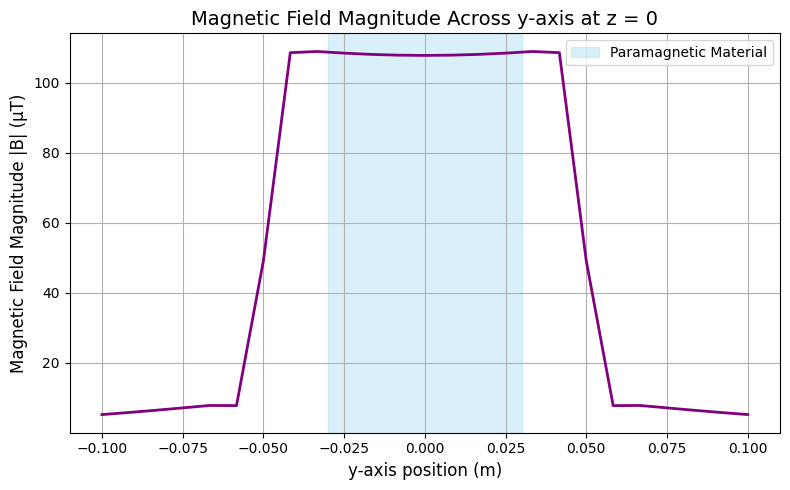

In [11]:
# --- Plot magnetic field magnitude across y-axis at z = 0 ---

# Select the row of Z that corresponds closest to z = 0
z_center_index = np.argmin(np.abs(z - 0))
y_line = Y[z_center_index, :]
By_line = By[z_center_index, :]
Bz_line = Bz[z_center_index, :]

# Compute magnitude of B field at each y position
B_magnitude = np.sqrt(By_line**2 + Bz_line**2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(y_line, B_magnitude * 1e6, color='purple', lw=2)  # Multiply to convert to µT for clarity
plt.axvspan(y_min, y_max, color='skyblue', alpha=0.3, label='Paramagnetic Material')

plt.title("Magnetic Field Magnitude Across y-axis at z = 0", fontsize=14)
plt.xlabel("y-axis position (m)", fontsize=12)
plt.ylabel("Magnetic Field Magnitude |B| (μT)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


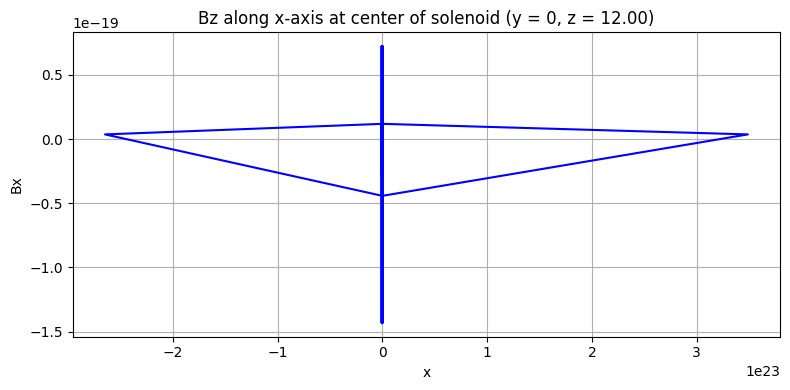

In [5]:
# Plot Bx vs x
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(By, By_line, color='blue')
plt.title("Bz along x-axis at center of solenoid (y = 0, z = {:.2f})".format(z_center_index))
plt.xlabel("x")
plt.ylabel("Bx")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

# Biot–Savart constant
def biot_savart(dl, r_vec):
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0])  # avoid singularity
    return np.cross(dl, r_vec) / r_mag**3

# Solenoid parameters
R = 0.05  # solenoid radius (m)
length = 0.2  # solenoid height (z-axis length) (m)
turns = 20  # total number of loops
I = 1.0  # current in amperes
n_segments = 100  # segments per loop

# Observation grid (in yz plane at x = 0)
y = np.linspace(-0.1, 0.1, 25)
z = np.linspace(-0.15, 0.15, 25)
Y, Z = np.meshgrid(y, z)

# Initialize magnetic field components
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)
# Paramagnetic region (centered inside solenoid)
mu_r = 10  # Relative permeability
para_width = 0.06  # y-axis width
para_height = 0.12  # z-axis height
para_center = (0.0, 0.0)  # (y, z) center

# Bounds of the region
y_min = para_center[0] - para_width / 2
y_max = para_center[0] + para_width / 2
z_min = para_center[1] - para_height / 2
z_max = para_center[1] + para_height / 2

# Apply magnetic enhancement inside the material
for idx in np.ndindex(Y.shape):
    y_val, z_val = Y[idx], Z[idx]
    if y_min <= y_val <= y_max and z_min <= z_val <= z_max:
        By[idx] *= mu_r
        Bz[idx] *= mu_r

# Build each loop at height z_loop
z_loops = np.linspace(-length/2, length/2, turns)

for z_loop in z_loops:
    theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
    dtheta = theta[1] - theta[0]

    # Wire path: full circular loop in x-y plane
    for i in range(n_segments):
        t0 = theta[i]
        t1 = theta[i] + dtheta

        # Segment endpoints in 3D (x, y, z)
        r0 = np.array([R * np.cos(t0), R * np.sin(t0), z_loop])
        r1 = np.array([R * np.cos(t1), R * np.sin(t1), z_loop])
        dl = r1 - r0

        # For cross section at x=0, only compute B in y-z plane
        for idx in np.ndindex(Y.shape):
            obs_point = np.array([0.0, Y[idx], Z[idx]])
            r_vec = obs_point - r0
            dB = biot_savart(dl, r_vec)
            By[idx] += dB[1]
            Bz[idx] += dB[2]

# Scale Biot–Savart result
const = mu_0 * I / (4 * np.pi)
By *= const
Bz *= const
fig, ax = plt.subplots(figsize=(8, 6))

# Plot magnetic field vectors
ax.quiver(Y, Z, By, Bz, color='purple', scale=0.005, scale_units='xy', angles='xy')
# Add paramagnetic material visualization
ax.add_patch(plt.Rectangle((y_min, z_min), para_width, para_height,
                           color='skyblue', alpha=0.4, label='Paramagnetic Material'))

# Plot wire cross sections in gray
for z_loop in z_loops:
    # Since we are at x = 0, the circular loop intersects at y = ±R
    ax.plot([-R, R], [z_loop, z_loop], 'o', color='gray', markersize=4)
# Plot curling electric field around each wire point (visual only)
circle_radius = 0.008
circle_density = 12

# Choose curl direction (clockwise or counterclockwise)
def plot_circulating_field(center, clockwise=True):
    angles = np.linspace(0, 2*np.pi, circle_density, endpoint=False)
    for angle in angles:
        # Arrow start point
        x0 = center[0] + circle_radius * np.cos(angle)
        y0 = center[1] + circle_radius * np.sin(angle)

        # Tangent vector (curl direction)
        dx = -circle_radius * np.sin(angle)
        dy = circle_radius * np.cos(angle)
        if clockwise:
            dx, dy = -dx, -dy

        ax.arrow(x0, y0, dx * 0.2, dy * 0.2,
                 head_width=0.0015, head_length=0.002,
                 fc='orange', ec='orange', alpha=0.8)

# Add circulating E field around each wire point (right-hand rule)
for z_loop in z_loops:
    plot_circulating_field(center=(R, z_loop), clockwise=False)  # front side
    plot_circulating_field(center=(-R, z_loop), clockwise=True)  # back side

# Formatting
ax.set_title("Magnetic Field of a Solenoid (Cross Section at x = 0)", fontsize=14)
ax.set_xlabel("y-axis (m)")
ax.set_ylabel("z-axis (m)")
ax.set_xlim(-0.12, 0.12)
ax.set_ylim(-0.15, 0.15)
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()
